<a href="https://colab.research.google.com/github/tinachung49/Portfolio/blob/main/Implied%20Volatility%20Calibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import norm
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 計算隱含波動率(二分法)

In [ ]:
df = pd.read_csv('drive/MyDrive/金融計算/test_options_data.csv')
df

,Date,expiration_date,S0,r,DTE,K,c_last,c_volume,p_last,p_volume
0,2024-01-02,2024-01-02,4742.830078,0.0555,0,"[4050, 4075, 4200, 4225, 4250, 4300, 4325, 433...","[nan, 658.48, 528.14, 519.84, 478.23, 439.42, ...","[nan, 1.0, 4.0, 1.0, 5.0, 9.0, 7.0, 1.0, nan, ...","[0.05, nan, nan, nan, nan, 0.05, nan, nan, 0.0...","[1.0, nan, nan, nan, nan, 2.0, nan, nan, 4.0, ..."
1,2024-01-02,2024-01-03,4742.830078,0.0555,1,"[4075, 4100, 4125, 4150, 4175, 4200, 4225, 425...","[658.73, nan, nan, nan, nan, 528.74, 520.39, 4...","[1.0, nan, nan, nan, nan, 3.0, 1.0, 2.0, nan, ...","[nan, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05...","[nan, 1.0, 500.0, 56.0, 1729.0, 3684.0, 505.0,..."
2,2024-01-02,2024-01-04,4742.830078,0.0555,2,"[3900, 3950, 4000, 4050, 4075, 4100, 4150, 417...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.07, 0.0...","[938.0, 3610.0, 1044.0, 12.0, 2.0, 54.0, 1.0, ..."
3,2024-01-02,2024-01-05,4742.830078,0.0555,3,"[3800, 3850, 3925, 3950, 3975, 4000, 4010, 402...","[nan, nan, nan, nan, nan, 736.58, nan, nan, na...","[nan, nan, nan, nan, nan, 2.0, nan, nan, nan, ...","[0.05, 0.07, 0.05, 0.05, 0.1, 0.1, 0.1, 0.1, 0...","[241.0, 1.0, 1.0, 31.0, 6.0, 159.0, 27.0, 15.0..."
4,2024-01-02,2024-01-08,4742.830078,0.0555,6,"[3800, 3850, 3900, 3950, 4000, 4050, 4100, 415...","[nan, nan, nan, nan, nan, nan, 627.52, 577.62,...","[nan, nan, nan, nan, nan, nan, 1.0, 1.0, nan, ...","[0.07, 0.05, 0.1, 0.1, 0.12, 0.1, 0.17, 0.15, ...","[1710.0, 1608.0, 2051.0, 5249.0, 4980.0, 1078...."
...,...,...,...,...,...,...,...,...,...,...
2768,2024-05-31,2024-06-28,5277.509766,0.0548,28,"[4225, 4230, 4250, 4260, 4295, 4300, 4320, 435...","[nan, nan, nan, nan, nan, 961.9, 903.92, nan, ...","[nan, nan, nan, nan, nan, 8.0, 2.0, nan, 10.0,...","[1.7, 1.65, 1.75, 1.55, 2.0, 1.46, nan, 1.75, ...","[6.0, 38.0, 12.0, 38.0, 38.0, 460.0, nan, 94.0..."
2769,2024-05-31,2024-07-01,5277.509766,0.0548,31,"[4250, 4300, 4450, 4500, 4550, 4700, 4750, 480...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.6, 1.8, 3.1, 2.11, 2.75, 4.5, 6.53, 6.3, 5....","[28.0, 42.0, 2.0, 7.0, 8.0, 34.0, 2.0, 8.0, 46..."
2770,2024-05-31,2024-07-02,5277.509766,0.0548,32,"[4250, 4500, 4700, 4800, 4850, 4900, 4950, 497...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.85, 2.8, 4.5, 7.82, 9.83, 11.2, 12.9, 10.0,...","[44.0, 12.0, 12.0, 20.0, 2.0, 4.0, 232.0, 316...."
2771,2024-05-31,2024-07-03,5277.509766,0.0548,33,"[4450, 4500, 4700, 4800, 4850, 4900, 4950, 500...","[nan, nan, nan, 443.89, nan, nan, nan, nan, na...","[nan, nan, nan, 2.0, nan, nan, nan, nan, nan, ...","[3.2, 2.95, 5.0, 7.51, 5.52, 6.8, 14.8, 18.7, ...","[2.0, 6.0, 4.0, 2.0, 6.0, 8.0, 32.0, 30.0, 2.0..."


In [ ]:
def bls(s,k,r,t,sig):
    d1 = (np.log(s/k) + (r+sig**2/2)*t)/(sig*np.sqrt(t))
    d2 = (np.log(s/k) + (r-sig**2/2)*t)/(sig*np.sqrt(t))
    call = s * norm.cdf(d1) - k * np.exp(-r*t) * norm.cdf(d2)
    put = k * np.exp(-r*t) * norm.cdf(-d2) - s * norm.cdf(-d1)
    return call, put

def bisection_call_iv(s,k,r,t,call):
    tol = 0.000001
    p1 = np.zeros(len(k)); p2 = np.ones(len(k))*10
    for m in range(50):
        sig = (p1+p2)/2.0
        callbs = bls(s, k, r, t, sig)[0]
        if (abs(callbs-call) < tol).all(): break
        index1 = callbs >= call; index2 = callbs <= call
        p2[index1] = sig[index1]; p1[index2] = sig[index2]
    return p1

def bisection_put_iv(s,k,r,t,put):
    tol = 0.000001
    p1 = np.zeros(len(k))
    p2 = np.ones(len(k))*10
    for m in range(50):
        sig = (p1+p2)/2.0
        putbs = bls(s, k, r, t, sig)[1]
        if (abs(putbs-put) < tol).all(): break
        index1 = putbs >= put
        index2 = putbs <= put
        p2[index1] = sig[index1]
        p1[index2] = sig[index2]
    return p1

In [ ]:
i = 5
df.loc[i]

,5
Date,2024-01-02
expiration_date,2024-01-09
S0,4742.830078
r,0.0555
DTE,7
K,"[3800, 3900, 3950, 4000, 4050, 4100, 4150, 420..."
c_last,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
c_volume,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
p_last,"[0.1, 0.15, 0.15, 0.15, 0.2, 0.2, 0.25, 0.3, 0..."
p_volume,"[729.0, 4245.0, 462.0, 35.0, 22.0, 524.0, 253...."


In [ ]:
nan = np.nan
S0 = df.loc[i,'S0']
K = np.array(eval(df.loc[i,'K']))
r = df.loc[i,'r']
T = df.loc[i,'DTE']/365
call = np.array(eval(df.loc[i,'c_last']))
put = np.array(eval(df.loc[i,'p_last']))
c_volume = np.array(eval(df.loc[i,'c_volume']))
p_volume = np.array(eval(df.loc[i,'p_volume']))


call = call[(K>=S0*0.9) & (K<=S0*1.1)]
put = put[(K>=S0*0.9) & (K<=S0*1.1)]
c_volume = c_volume[(K>=S0*0.9) & (K<=S0*1.1)]
p_volume = p_volume[(K>=S0*0.9) & (K<=S0*1.1)]
K = K[(K>=S0*0.9) & (K<=S0*1.1)]

In [ ]:
put_iv = bisection_put_iv(S0, K, r, T, put)
call_iv = bisection_call_iv(S0, K, r, T, call)

# Wing Model and WLS Calibration

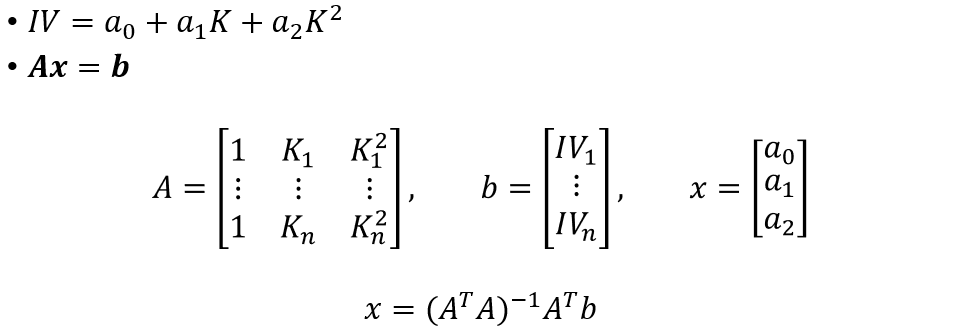

In [ ]:
index1 = (K <= S0)
index2 = (K > S0)
otm_iv = np.zeros(len(K))
otm_iv[index1] = put_iv[index1]
otm_iv[index2] = call_iv[index2]

otm_volume = np.zeros(len(K))
otm_volume[index1] = p_volume[index1]
otm_volume[index2] = c_volume[index2]

K = K[otm_iv != 0]
weights = otm_volume[otm_iv != 0]
otm_iv = otm_iv[otm_iv != 0]
weights[weights <= 0] = 1e-6

In [ ]:
print("--- OLS 校準 ---")
A = np.array([np.ones(len(K)), K, np.square(K)]).T
ols_coef = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(otm_iv)
res = otm_iv - A @ ols_coef
mse = np.sum((res)**2)/len(otm_iv)
mse
print(f"OLS 係數 (a0, a1, a2): {ols_coef}")
print(f"OLS 的 MSE: {mse:.8f}\n")

--- OLS 校準 ---
OLS 係數 (a0, a1, a2): [ 1.88609686e+01 -7.80904460e-03  8.12446178e-07]
OLS 的 MSE: 0.00003508



In [ ]:
print("--- WLS 校準 ---")
W = np.diag(weights)
wls_coef = np.linalg.inv(A.T @ W @ A) @ (A.T @ W @ otm_iv)
res_wls = otm_iv - A @ wls_coef
mse_wls = np.sum((res_wls)**2) / len(otm_iv)
print(f"WLS 係數 (a0, a1, a2): {wls_coef}")
print(f"WLS 的 MSE: {mse_wls:.8f}")

--- WLS 校準 ---
WLS 係數 (a0, a1, a2): [ 1.80366553e+01 -7.46038347e-03  7.75527675e-07]
WLS 的 MSE: 0.00004205



--- 繪製比較圖 ---


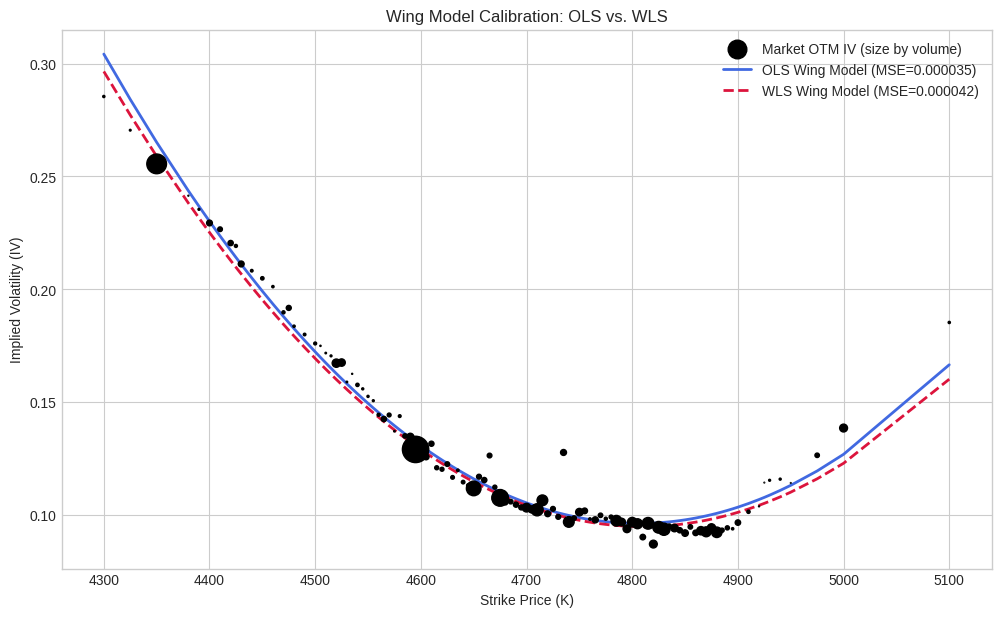

In [ ]:
print("\n--- 繪製比較圖 ---")
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 7))
plt.scatter(K, otm_iv, s=weights/10, c='black', label='Market OTM IV (size by volume)', zorder=3)
plt.plot(K, A @ ols_coef, label=f'OLS Wing Model (MSE={mse:.6f})', color='royalblue', linestyle='-', lw=2)
plt.plot(K, A @ wls_coef, label=f'WLS Wing Model (MSE={mse_wls:.6f})', color='crimson', linestyle='--', lw=2)

plt.xlabel('Strike Price (K)')
plt.ylabel('Implied Volatility (IV)')
plt.title('Wing Model Calibration: OLS vs. WLS')
plt.legend()
plt.show()

#Q1(d)  CPU vs GPU

In [ ]:
import time
try:
    import cupy as cp
    print("CuPy 函式庫已成功匯入！")
    gpu_available = True
except ImportError:
    print("CuPy 函式庫未安裝或匯入失敗。")
    gpu_available = False

iterations = 50000

# --- CPU ---
print(f"\n--- CPU(執行 {iterations} 次) ---")

start_time_cpu = time.time()
for _ in range(iterations):
    ols_coef_cpu = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(otm_iv)

    W_cpu = np.diag(weights)
    wls_coef_cpu = np.linalg.inv(A.T @ W_cpu @ A) @ (A.T @ W_cpu @ otm_iv)

end_time_cpu = time.time()
cpu_duration = end_time_cpu - start_time_cpu
print(f"CPU 總耗時: {cpu_duration:.4f} 秒")

# --- GPU ---
if gpu_available:
    print(f"\n---  GPU (CuPy) 效能測試 (執行 {iterations} 次) ---")

    A_gpu = cp.asarray(A)
    otm_iv_gpu = cp.asarray(otm_iv)
    weights_gpu = cp.asarray(weights)

    start_time_gpu = time.time()
    for _ in range(iterations):
        ols_coef_gpu = cp.linalg.inv(A_gpu.T @ A_gpu) @ A_gpu.T @ otm_iv_gpu

        W_gpu = cp.diag(weights_gpu)
        wls_coef_gpu = cp.linalg.inv(A_gpu.T @ W_gpu @ A_gpu) @ (A_gpu.T @ W_gpu @ otm_iv_gpu)

    cp.cuda.Stream.null.synchronize()

    end_time_gpu = time.time()
    gpu_duration = end_time_gpu - start_time_gpu
    print(f"GPU 總耗時: {gpu_duration:.4f} 秒")

    print("\n--- 效能比較結果 ---")
    if cpu_duration > gpu_duration:
        speedup = cpu_duration / gpu_duration
        print(f"GPU 比 CPU 快了約 {speedup:.2f} 倍")
    else:
        slowdown = gpu_duration / cpu_duration
        print(f"CPU 比 GPU 快了約 {slowdown:.2f} 倍")

CuPy 函式庫已成功匯入！

--- CPU(執行 50000 次) ---
CPU 總耗時: 2.4224 秒

---  GPU (CuPy) 效能測試 (執行 50000 次) ---
GPU 總耗時: 40.3373 秒

--- 效能比較結果 ---
CPU 比 GPU 快了約 16.65 倍


分別測量 OLS 和 WLS 使用 GPU 前後的時間差異


In [ ]:
import time
try:
    import cupy as cp
    print("CuPy 函式庫已成功匯入！")
    gpu_available = True
except ImportError:
    print("CuPy 函式庫未安裝或匯入失敗。")
    gpu_available = False

iterations = 50000

if gpu_available:
    # 先一次性將所有數據傳輸到 GPU
    A_gpu = cp.asarray(A)
    otm_iv_gpu = cp.asarray(otm_iv)
    weights_gpu = cp.asarray(weights)
    # 預先建立好W矩陣
    W_cpu = np.diag(weights)
    W_gpu = cp.diag(weights_gpu)
    _ = cp.linalg.inv(A_gpu.T @ A_gpu)
    cp.cuda.Stream.null.synchronize()


# --- OLS 效能比較 ---
print(f"\n--- OLS 校準效能比較 (執行 {iterations} 次) ---")
# CPU
start_time_cpu = time.time()
for _ in range(iterations):
    ols_coef_cpu = np.linalg.inv(A.T @ A) @ A.T @ otm_iv
end_time_cpu = time.time()
cpu_duration_ols = end_time_cpu - start_time_cpu
print(f"CPU (OLS) 總耗時: {cpu_duration_ols:.4f} 秒")

# GPU
if gpu_available:
    start_time_gpu = time.time()
    for _ in range(iterations):
        ols_coef_gpu = cp.linalg.inv(A_gpu.T @ A_gpu) @ A_gpu.T @ otm_iv_gpu
    cp.cuda.Stream.null.synchronize()
    end_time_gpu = time.time()
    gpu_duration_ols = end_time_gpu - start_time_gpu
    print(f"GPU (OLS) 總耗時: {gpu_duration_ols:.4f} 秒")
    print(f"   => OLS 加速效果: {cpu_duration_ols / gpu_duration_ols:.2f} 倍")


# --- WLS 效能比較 ---
print(f"\n--- WLS 校準效能比較 (執行 {iterations} 次) ---")
# CPU
start_time_cpu = time.time()
for _ in range(iterations):
    wls_coef_cpu = np.linalg.inv(A.T @ W_cpu @ A) @ (A.T @ W_cpu @ otm_iv)
end_time_cpu = time.time()
cpu_duration_wls = end_time_cpu - start_time_cpu
print(f"CPU (WLS) 總耗時: {cpu_duration_wls:.4f} 秒")

# GPU
if gpu_available:
    start_time_gpu = time.time()
    for _ in range(iterations):
        wls_coef_gpu = cp.linalg.inv(A_gpu.T @ W_gpu @ A_gpu) @ (A_gpu.T @ W_gpu @ otm_iv_gpu)
    cp.cuda.Stream.null.synchronize()
    end_time_gpu = time.time()
    gpu_duration_wls = end_time_gpu - start_time_gpu
    print(f"GPU (WLS) 總耗時: {gpu_duration_wls:.4f} 秒")
    print(f"   => WLS 加速效果: {cpu_duration_wls / gpu_duration_wls:.2f} 倍")

CuPy 函式庫已成功匯入！

--- OLS 校準效能比較 (執行 50000 次) ---
CPU (OLS) 總耗時: 0.7829 秒
GPU (OLS) 總耗時: 15.9554 秒
   => OLS 加速效果: 0.05 倍

--- WLS 校準效能比較 (執行 50000 次) ---
CPU (WLS) 總耗時: 1.2503 秒
GPU (WLS) 總耗時: 21.9912 秒
   => WLS 加速效果: 0.06 倍


#Wing Model: Two-Stage Calibration (Outlier Removal + WLS)

如果要執行這一段的話，要記得要略過不要執行Wing Model and WLS Calibration，因為這一段有多加偵測離群值的功能，讓模型更精確

In [ ]:
print("--- 階段一：初步 OLS 以偵測離群值 ---")
index1 = (K <= S0); index2 = (K > S0)
otm_iv = np.zeros(len(K))
otm_volume = np.zeros(len(K))
otm_iv[index1] = put_iv[index1]
otm_iv[index2] = call_iv[index2]
otm_volume[index1] = p_volume[index1]
otm_volume[index2] = c_volume[index2]

--- 階段一：初步 OLS 以偵測離群值 ---


In [ ]:
K_initial = K[otm_iv > 0]
otm_iv_initial = otm_iv[otm_iv > 0]
weights_initial = otm_volume[otm_iv > 0]
weights_initial[weights_initial <= 0] = 1e-6

In [ ]:
A_initial = np.array([np.ones(len(K_initial)), K_initial, np.square(K_initial)]).T
ols_coef_initial = np.linalg.inv(A_initial.T.dot(A_initial)).dot(A_initial.T).dot(otm_iv_initial)
res_initial = otm_iv_initial - A_initial @ ols_coef_initial

In [ ]:
# 偵測離群值 (Outlier Detection)
mu = np.mean(res_initial)
sig = np.std(res_initial)
lb = mu - 1.96 * sig
ub = mu + 1.96 * sig

outlier_filter = (res_initial < lb) | (res_initial > ub)
inlier_filter = ~outlier_filter

outlier_k = K_initial[outlier_filter]
outlier_iv = otm_iv_initial[outlier_filter]
print(f"偵測到 {len(outlier_k)} 個離群值。")

偵測到 6 個離群值。


In [ ]:
# 建立「乾淨」的數據集
K_clean = K_initial[inlier_filter]
otm_iv_clean = otm_iv_initial[inlier_filter]
weights_clean = weights_initial[inlier_filter]

In [ ]:
print("\n--- 階段二：在移除離群值的乾淨數據上，執行最終 OLS 與 WLS ---")

# 執行最終 OLS (在乾淨數據上)
A_clean = np.array([np.ones(len(K_clean)), K_clean, np.square(K_clean)]).T
ols_coef_clean = np.linalg.inv(A_clean.T @ A_clean) @ A_clean.T @ otm_iv_clean
mse_ols_clean = np.sum((otm_iv_clean - A_clean @ ols_coef_clean)**2) / len(otm_iv_clean)
print(f"最終 OLS 的 MSE (clean data): {mse_ols_clean:.8f}")

# 執行最終 WLS (在乾淨數據上)
W_clean = np.diag(weights_clean)
wls_coef_clean = np.linalg.inv(A_clean.T @ W_clean @ A_clean) @ (A_clean.T @ W_clean @ otm_iv_clean)
mse_wls_clean = np.sum((otm_iv_clean - A_clean @ wls_coef_clean)**2) / len(otm_iv_clean)
print(f"最終 WLS 的 MSE (clean data): {mse_wls_clean:.8f}")


--- 階段二：在移除離群值的乾淨數據上，執行最終 OLS 與 WLS ---
最終 OLS 的 MSE (clean data): 0.00001506
最終 WLS 的 MSE (clean data): 0.00002498



--- 繪製比較圖 ---


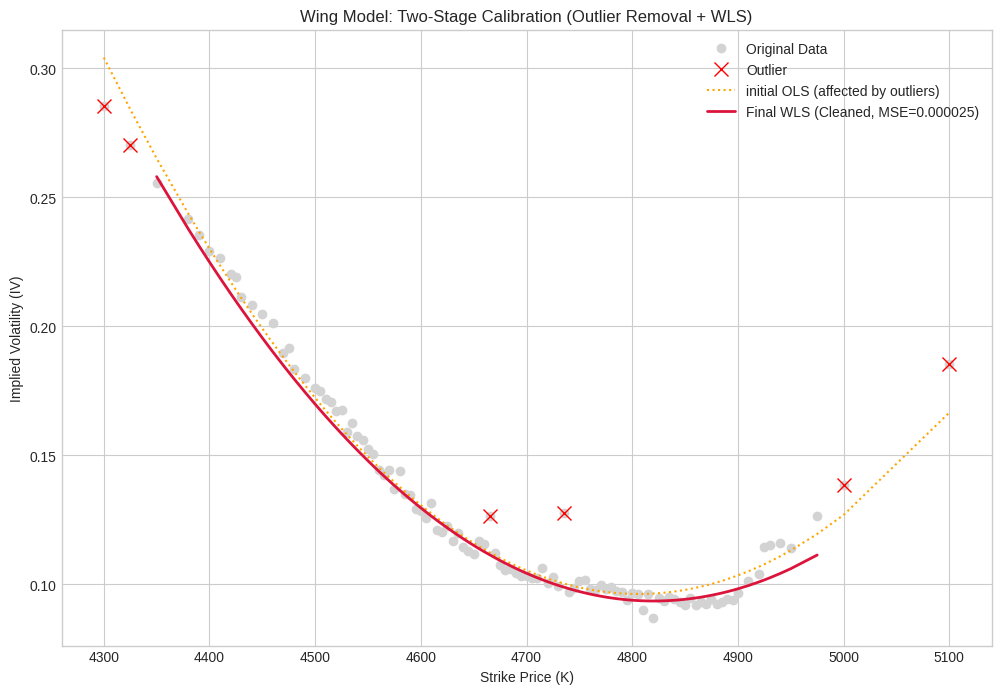

In [ ]:
print("\n--- 繪製比較圖 ---")
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

# 繪製所有原始數據點
plt.plot(K_initial, otm_iv_initial, 'o', color='lightgray', label='Original Data')
# 標示出被偵測為離群值的點
plt.plot(outlier_k, outlier_iv, 'rx', markersize=10, label='Outlier')
# 繪製初步的 OLS (受離群值影響)
plt.plot(K_initial, A_initial @ ols_coef_initial, label='initial OLS (affected by outliers)', color='orange', linestyle=':')
# 繪製在乾淨數據上最終的 WLS
plt.plot(K_clean, A_clean @ wls_coef_clean, label=f'Final WLS (Cleaned, MSE={mse_wls_clean:.6f})', color='crimson', linestyle='-', lw=2)


plt.xlabel('Strike Price (K)'); plt.ylabel('Implied Volatility (IV)')
plt.title('Wing Model: Two-Stage Calibration (Outlier Removal + WLS)')
plt.legend(); plt.show()